In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

import ipywidgets as widgets
from IPython.display import display, clear_output

pd.options.display.max_columns = None
# df_wyscout_players = pd.read_excel('../../data/input/Argentina_B/players/players.xlsx').reset_index(drop=True)
# df_wyscout_players = pd.read_csv(r'C:\Users\e.rangel\Documents\emra\Futbol-R-Python-Quarto\R\Modulo 2\data\out\players_liga_argentina_B.csv').reset_index(drop=True)
# df_wyscout_players = pd.read_csv(r'G:\My Drive\soccer\Futbol-R-Python-Quarto\R\Modulo 2\data\out\Colombia. Liga BetPlay_players.csv').reset_index(drop=True)
df_wyscout_players = pd.read_csv('../../../R/Modulo 2/data/out/Ecuador. Liga Pro_players.csv').reset_index(drop=True)

In [2]:
df = df_wyscout_players.copy()
df = df.rename(columns = {
    "jugador": "Player",
    "asistencias_90_48": "asistencias_90",})
df['Player'] = df['Player'].str.split('\\',expand=True)[0]
df.Player.unique()

# df = df[df['equipo']=='Vinotinto de Ecuador']

df = df.fillna(0)

In [24]:
category_metrics_players = pd.DataFrame([
    ## Players
    ("jugador", "Jugador", "General" , "Player"),
    ("equipo", "Equipo", "General" , "Equipment"),
    ("equipo_durante_el_periodo_seleccionado", "Equipo Durante El Periodo Seleccionado", "General" , "Team During The Selected Period"),
    ("posicion_especifica", "Posición Específica", "General" , "Specific Position"),
    ("edad", "Edad", "General" , "Age"),
    ("valor_de_mercado_transfermarkt", "Valor de mercado", "General" , "Market value"),
    ("vencimiento_contrato", "Vencimiento contrato", "General" , "Contract expiration"),
    ("partidos_jugados", "Partidos jugados", "General" , "Matches played"),
    ("minutos", "Minutos", "General" , "Minutes"),
    ("goles", "Goles", "Attack" , "Goals"),
    ("x_g", "xG", "Attack" , "xG"),
    ("asistencias", "Asistencias", "Creativity" , "Assists"),
    ("x_a", "xA", "Creativity" , "xA"),
    ("duelos_90", "Duelos / 90", "Physical" , "Duels / 90"),
    ("duelos_ganados_percent", "Duelos ganados (%)", "Physical" , "Duels won (%)"),
    ("pais_de_nacimiento", "País de nacimiento", "General" , "Country of birth"),
    ("pasaporte", "Pasaporte", "General" , "Passport"),
    ("pie", "Pie dominante", "General" , "Dominant foot"),
    ("altura", "Altura", "General" , "Height"),
    ("peso", "Peso", "General" , "Weight"),
    ("en_prestamo", "En préstamo", "General" , "On loan"),
    ("acciones_defensivas_realizadas_90", "Acciones defensivas / 90", "Defense" , "Defensive actions / 90"),
    ("duelos_defensivos_90", "Duelos defensivos / 90", "Defense" , "Defensive duels / 90"),
    ("duelos_defensivos_ganados_percent", "Duelos defensivos ganados (%)", "Defense" , "Defensive duels won (%)"),
    ("duelos_aereos_en_los_90", "Duelos aéreos / 90", "Defense" , "Aerial Duels / 90"),
    ("duelos_aereos_ganados_percent", "Duelos aéreos ganados (%)", "Defense" , "Aerial duels won (%)"),
    ("entradas_90", "Entradas / 90", "Defense" , "Tickets / 90"),
    ("posesion_conquistada_despues_de_una_entrada", "Posesión tras entrada", "Defense" , "Possession after entry"),
    ("tiros_interceptados_90", "Tiros interceptados / 90", "Defense" , "Intercepted shots / 90"),
    ("interceptaciones_90", "Intercepciones / 90", "Defense" , "Interceptions / 90"),
    ("posesion_conquistada_despues_de_una_interceptacion", "Posesión tras intercepción", "Defense" , "Possession after interception"),
    ("faltas_90", "Faltas / 90", "Discipline" , "Fouls / 90"),
    ("tarjetas_amarillas", "Tarjetas amarillas", "Discipline" , "Yellow cards"),
    ("tarjetas_amarillas_90", "Tarjetas amarillas / 90", "Discipline" , "Yellow cards / 90"),
    ("tarjetas_rojas", "Tarjetas rojas", "Discipline" , "Red cards"),
    ("tarjetas_rojas_90", "Tarjetas rojas / 90", "Discipline" , "Red cards / 90"),
    ("acciones_de_ataque_exitosas_90", "Acciones ofensivas exitosas / 90", "Attack" , "Successful offensive actions / 90"),
    ("goles_90", "Goles / 90", "Attack" , "Goals / 90"),
    ("goles_excepto_los_penaltis", "Goles (sin penaltis)", "Attack" , "Goals (without penalties)"),
    ("goles_excepto_los_penaltis_90", "Goles (sin penaltis) / 90", "Attack" , "Goals (without penalties) / 90"),
    ("x_g_90", "xG / 90", "Attack" , "xG / 90"),
    ("goles_de_cabeza", "Goles de cabeza", "Attack" , "Headed goals"),
    ("goles_de_cabeza_90", "Goles de cabeza / 90", "Attack" , "Headed goals / 90"),
    ("remates", "Remates", "Attack" , "Auctions"),
    ("remates_90", "Remates / 90", "Attack" , "Auctions / 90"),
    ("tiros_a_la_porteria_percent", "Precisión de remates (%)", "Attack" , "Shot accuracy (%)"),
    ("goles_hechos_percent", "Tasa de conversión (%)", "Attack" , "Conversion rate (%)"),
    ("asistencias_90", "Asistencias / 90", "Creativity" , "Assists / 90"),
    ("centros_90", "Centros / 90", "Attack" , "Centers / 90"),
    ("precision_centros_percent", "Precisión centros (%)", "Attack" , "Accuracy centers (%)"),
    ("centros_desde_la_banda_izquierda_90", "Centros izquierda / 90", "Attack" , "Left centers / 90"),
    ("precision_centros_desde_la_banda_izquierda_percent", "Precisión izquierda (%)", "Attack" , "Left accuracy (%)"),
    ("centros_desde_la_banda_derecha_90", "Centros derecha / 90", "Attack" , "Centers right / 90"),
    ("precision_centros_desde_la_banda_derecha_percent", "Precisión derecha (%)", "Attack" , "Right accuracy (%)"),
    ("centros_al_area_pequena_90", "Centros al área pequeña / 90", "Attack" , "Crosses into the small area / 90"),
    ("regates_90", "Regates / 90", "Physical" , "Dribbling / 90"),
    ("regates_realizados_percent", "Éxito en regates (%)", "Physical" , "Dribbling success (%)"),
    ("duelos_atacantes_90", "Duelos ofensivos / 90", "Attack" , "Offensive duels / 90"),
    ("duelos_atacantes_ganados_percent", "Duelos ofensivos ganados (%)", "Attack" , "Offensive duels won (%)"),
    ("toques_en_el_area_de_penalti_90", "Toques en área / 90", "Attack" , "Touches in the area / 90"),
    ("carreras_en_progresion_90", "Carreras progresivas / 90", "Attack" , "Progressive Races / 90"),
    ("aceleraciones_90", "Aceleraciones / 90", "Attack" , "Accelerations / 90"),
    ("pases_recibidos_90", "Pases recibidos / 90", "Physical" , "Passes received / 90"),
    ("pases_largos_recibidos_90", "Pases largos recibidos / 90", "Physical" , "Long passes received / 90"),
    ("faltas_recibidas_90", "Faltas recibidas / 90", "Discipline" , "Fouls received / 90"),
    ("pases_90", "Pases / 90", "Passing" , "Passes / 90"),
    ("precision_pases_percent", "Precisión total pases (%)", "Passing" , "Total pass accuracy (%)"),
    ("pases_hacia_adelante_90", "Pases hacia adelante / 90", "Passing" , "Forward passes / 90"),
    ("precision_pases_hacia_adelante_percent", "Precisión adelante (%)", "Passing" , "Forward Accuracy (%)"),
    ("pases_hacia_atras_90", "Pases hacia atrás / 90", "Passing" , "Back passes / 90"),
    ("precision_pases_hacia_atras_percent", "Precisión atrás (%)", "Passing" , "Backward Accuracy (%)"),
    ("pases_laterales_90", "Pases laterales / 90", "Passing" , "Lateral passes / 90"),
    ("precision_pases_laterales_percent", "Precisión lateral (%)", "Passing" , "Lateral accuracy (%)"),
    ("pases_cortos_medios_90", "Pases cortos/medios / 90", "Passing" , "Short/medium passes / 90"),
    ("precision_pases_cortos_medios_percent", "Precisión cortos/medios (%)", "Passing" , "Short/medium accuracy (%)"),
    ("pases_largos_90", "Pases largos / 90", "Passing" , "Long passes / 90"),
    ("precision_pases_largos_percent", "Precisión pases largos (%)", "Passing" , "Long pass accuracy (%)"),
    ("longitud_media_pases_m", "Longitud media de pases (m)", "Passing" , "Average pass length (m)"),
    ("longitud_media_pases_largos_m", "Longitud media de pases largos (m)", "Passing" , "Average length of long passes (m)"),
    ("x_a_90", "xA / 90", "Creativity" , "xA / 90"),
    ("second_assists_90", "Segunda asistencia / 90", "Creativity" , "Second assist / 90"),
    ("third_assists_90", "Tercera asistencia / 90", "Creativity" , "Third assist / 90"),
    ("desmarques_90", "Desmarques / 90", "Attack" , "Unmarks / 90"),
    ("precision_desmarques_percent", "Precisión desmarques (%)", "Attack" , "Accuracy of runs (%)"),
    ("jugadas_claves_90", "Pases clave / 90", "Creativity" , "Key passes / 90"),
    ("pases_en_el_ultimo_tercio_90", "Pases en tercio final / 90", "Creativity" , "Passes in the final third / 90"),
    ("precision_pases_en_el_ultimo_tercio_percent", "Precisión tercio final (%)", "Creativity" , "Final third accuracy (%)"),
    ("pases_al_area_de_penalti_90", "Pases al área / 90", "Creativity" , "Passes to the area / 90"),
    ("pases_hacia_el_area_pequena_percent", "Precisión área pequeña (%)", "Creativity" , "Small area accuracy (%)"),
    ("pases_en_profundidad_90", "Pases en profundidad / 90", "Creativity" , "Deep passes / 90"),
    ("precision_pases_en_profundidad_percent", "Precisión profundidad (%)", "Creativity" , "Depth accuracy (%)"),
    ("ataque_en_profundidad_90", "Ataques en profundidad / 90", "Attack" , "Deep Attacks / 90"),
    ("centros_desde_el_ultimo_tercio_90", "Centros desde último tercio / 90", "Attack" , "Centers from the final third / 90"),
    ("pases_progresivos_90", "Pases progresivos / 90", "Passing" , "Progressive passes / 90"),
    ("precision_pases_progresivos_percent", "Precisión progresivos (%)", "Passing" , "Progressive accuracy (%)"),
    ("goles_recibidos", "Goles recibidos", "Goalkeeping" , "Goals received"),
    ("goles_recibidos_90", "Goles recibidos / 90", "Goalkeeping" , "Goals received / 90"),
    ("remates_en_contra", "Remates en contra", "Goalkeeping" , "Counterattacks"),
    ("remates_en_contra_90", "Remates en contra / 90", "Goalkeeping" , "Shots against / 90"),
    ("porterias_imbatidas_en_los_90", "Porterías imbatidas / 90", "Goalkeeping" , "Clean sheets / 90"),
    ("paradas_percent", "Porcentaje de paradas", "Goalkeeping" , "Percentage of stops"),
    ("x_g_en_contra", "xG en contra", "Goalkeeping" , "xG against"),
    ("x_g_en_contra_90", "xG en contra / 90", "Goalkeeping" , "xG against / 90"),
    ("goles_evitados", "Goles evitados", "Goalkeeping" , "Goals avoided"),
    ("goles_evitados_90", "Goles evitados / 90", "Goalkeeping" , "Goals avoided / 90"),
    ("pases_hacia_atras_recibidos_del_arquero_90", "Pases del arquero / 90", "Goalkeeping" , "Goalkeeper passes / 90"),
    ("salidas_90", "Salidas / 90", "Goalkeeping" , "Exits / 90"),
    ("tiros_libres_90", "Tiros libres / 90", "Attack" , "Free throws / 90"),
    ("tiros_libres_directos_90", "Tiros libres directos / 90", "Attack" , "Direct free kicks / 90"),
    ("tiros_libres_directos_percent", "Precisión tiros libres (%)", "Attack" , "Free throw accuracy (%)"),
    ("corneres_90", "Corneres / 90", "Attack" , "Corners / 90"),
    ("penaltis_a_favor", "Penaltis a favor", "Attack" , "Penalties in favor"),
    ("penaltis_realizados_percent", "Penaltis convertidos (%)", "Attack" , "Penalties converted (%)")
], columns=["variable", "nombre", "tipo", "name"])

category_metrics_players.head(2)

,variable,nombre,tipo,name
0,jugador,Jugador,General,Player
1,equipo,Equipo,General,Equipment


In [15]:
metricas_por_tipo = {
    "Delanteros": [
        "goles_90", "x_g_90", "x_a_90", "goles_excepto_los_penaltis_90", "asistencias_90",
        "remates_90", "tiros_a_la_porteria_percent", "toques_en_el_area_de_penalti_90",
        "duelos_atacantes_90", "duelos_atacantes_ganados_percent", "desmarques_90",
        "precision_desmarques_percent", "carreras_en_progresion_90", "pases_al_area_de_penalti_90"
    ],
    "Extremos": [
        "regates_90", "regates_realizados_percent", "asistencias_90", "x_g_90", "x_a_90",
        "centros_90", "precision_centros_percent", "pases_en_el_ultimo_tercio_90",
        "precision_pases_en_el_ultimo_tercio_percent", "duelos_atacantes_90",
        "duelos_atacantes_ganados_percent", "toques_en_el_area_de_penalti_90",
        "carreras_en_progresion_90", "desmarques_90", "pases_al_area_de_penalti_90"
    ],
    "Mediocampo_Ofensivo": [
        "asistencias_90", "x_g_90", "x_a_90", "jugadas_claves_90", "pases_en_el_ultimo_tercio_90",
        "precision_pases_en_el_ultimo_tercio_percent", "remates_90", "goles_90",
        "pases_progresivos_90", "pases_al_area_de_penalti_90", "carreras_en_progresion_90",
        "toques_en_el_area_de_penalti_90", "second_assists_90", "pases_en_profundidad_90"
    ],
    "Mediocampo": [
        "pases_90", "x_g_90", "x_a_90", "precision_pases_percent", "pases_hacia_adelante_90",
        "precision_pases_hacia_adelante_percent", "pases_largos_90", "precision_pases_largos_percent",
        "pases_progresivos_90", "jugadas_claves_90", "duelos_90", "duelos_ganados_percent",
        "interceptaciones_90", "entradas_90", "posesion_conquistada_despues_de_una_interceptacion",
        "faltas_90"
    ],
    "Mediocampo_Defensivo": [
        "duelos_defensivos_90", "x_g_90", "x_a_90", "duelos_defensivos_ganados_percent",
        "interceptaciones_90", "entradas_90", "posesion_conquistada_despues_de_una_entrada",
        "pases_90", "precision_pases_percent", "pases_hacia_atras_90",
        "precision_pases_hacia_atras_percent", "faltas_90", "tarjetas_amarillas_90",
        "posesion_conquistada_despues_de_una_interceptacion", "pases_laterales_90",
        "precision_pases_laterales_percent"
    ],
    "Defensas": [
        "duelos_defensivos_90", "x_g_90", "x_a_90", "duelos_defensivos_ganados_percent",
        "interceptaciones_90", "entradas_90", "duelos_aereos_en_los_90",
        "duelos_aereos_ganados_percent", "posesion_conquistada_despues_de_una_entrada",
        "tiros_interceptados_90", "pases_90", "precision_pases_percent", "pases_largos_90",
        "precision_pases_largos_percent", "faltas_90", "tarjetas_amarillas_90"
    ],
    "Arqueros": [
        "goles_recibidos_90", "x_g_en_contra_90", "goles_evitados_90",
        "paradas_percent", "porterias_imbatidas_en_los_90", "remates_en_contra_90",
        "salidas_90", "pases_hacia_atras_recibidos_del_arquero_90",
        "pases_largos_90", "precision_pases_largos_percent"
    ]
}

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_player_percentiles_by_category(
    df, player_name, categoria, metricas_por_tipo, category_metrics_players, min_minutes=60
):
    """
    Grafica barras horizontales de percentiles para un jugador según su categoría.
    - df: DataFrame con métricas.
    - player_name: nombre del jugador.
    - categoria: clave del diccionario metricas_por_tipo.
    - metricas_por_tipo: diccionario de métricas por categoría.
    - category_metrics_players: DataFrame con info de métricas (para nombres y tipo).
    - min_minutes: filtra jugadores con pocos minutos.
    """
    # Renombrar columna 'jugador' a 'Player' si es necesario
    if 'jugador' in df.columns:
        df = df.rename(columns={'jugador': 'Player'})
    # Filtrar por minutos jugados si existe la columna
    if 'minutos' in df.columns:
        df_filtrado = df[df['minutos'] > min_minutes].copy()
    else:
        df_filtrado = df.copy()

    # Solo usar métricas que existen en el DataFrame
    metrics = [m for m in metricas_por_tipo[categoria] if m in df_filtrado.columns]
    metric_info = category_metrics_players.set_index('variable').loc[metrics]
    metric_labels = metric_info['nombre'].tolist()
    metric_types = metric_info['tipo'].tolist()

    percentiles = df_filtrado[metrics].rank(pct=True) * 100
    player_row = df_filtrado[df_filtrado['Player'] == player_name]
    if player_row.empty:
        print(f"Jugador '{player_name}' no encontrado.")
        return
    player_percentiles = percentiles.loc[player_row.index].iloc[0]
    player_values = player_row[metrics].iloc[0]
    max_values = df_filtrado[metrics].max()

    # Preparar datos para gráfico
    plot_data = pd.DataFrame({
        'Métrica': metric_labels,
        'Valor': player_values.values,
        'Percentil': player_percentiles.values,
        'Tipo': metric_types,
        'Maximo': max_values.values
    })

    # Agrupar por tipo para mostrar etiquetas horizontales
    plot_data['Tipo'] = plot_data['Tipo'].str.upper()
    plot_data = plot_data.sort_values(['Tipo', 'Percentil'], ascending=[True, False]).reset_index(drop=True)

    def color_bar(p):
        if p > 66:
            return '#2ecc40'  # verde
        elif p > 33:
            return '#ffa600'  # naranja
        else:
            return '#ff3333'  # rojo

    plt.figure(figsize=(13, max(6, len(plot_data)*0.6)))
    bars = plt.barh(plot_data['Métrica'], plot_data['Percentil'],
                    color=[color_bar(p) for p in plot_data['Percentil']])

    # Valor del jugador a la izquierda
    for i, val in enumerate(plot_data['Valor']):
        plt.text(-8, i, f"{val:.2f}", va="center", ha="right", fontsize=11, color="white", weight="bold")

    # Valor máximo a la derecha, corrido para no superponerse
    for i, maxval in enumerate(plot_data['Maximo']):
        plt.text(105, i, f"Max: {maxval:.2f}", va="center", ha="left", fontsize=10, color="#ffe066", weight="bold")

    # Etiquetas de tipo agrupadas horizontalmente
    last_tipo = None
    for i, tipo in enumerate(plot_data['Tipo']):
        if tipo != last_tipo:
            plt.text(-30, i, tipo, va="center", ha="left", fontsize=13, color="#00e6e6", weight="bold", rotation=0)
            last_tipo = tipo

    plt.xlabel("Percentil (%)")
    plt.xlim(-35, 120)
    plt.title(f"Valor por 90' - {player_name} ({categoria})", fontsize=16, weight="bold")
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# plot_player_percentiles_by_category(df, "D. Luna", "Mediocampo_Ofensivo", metricas_por_tipo, category_metrics_players)

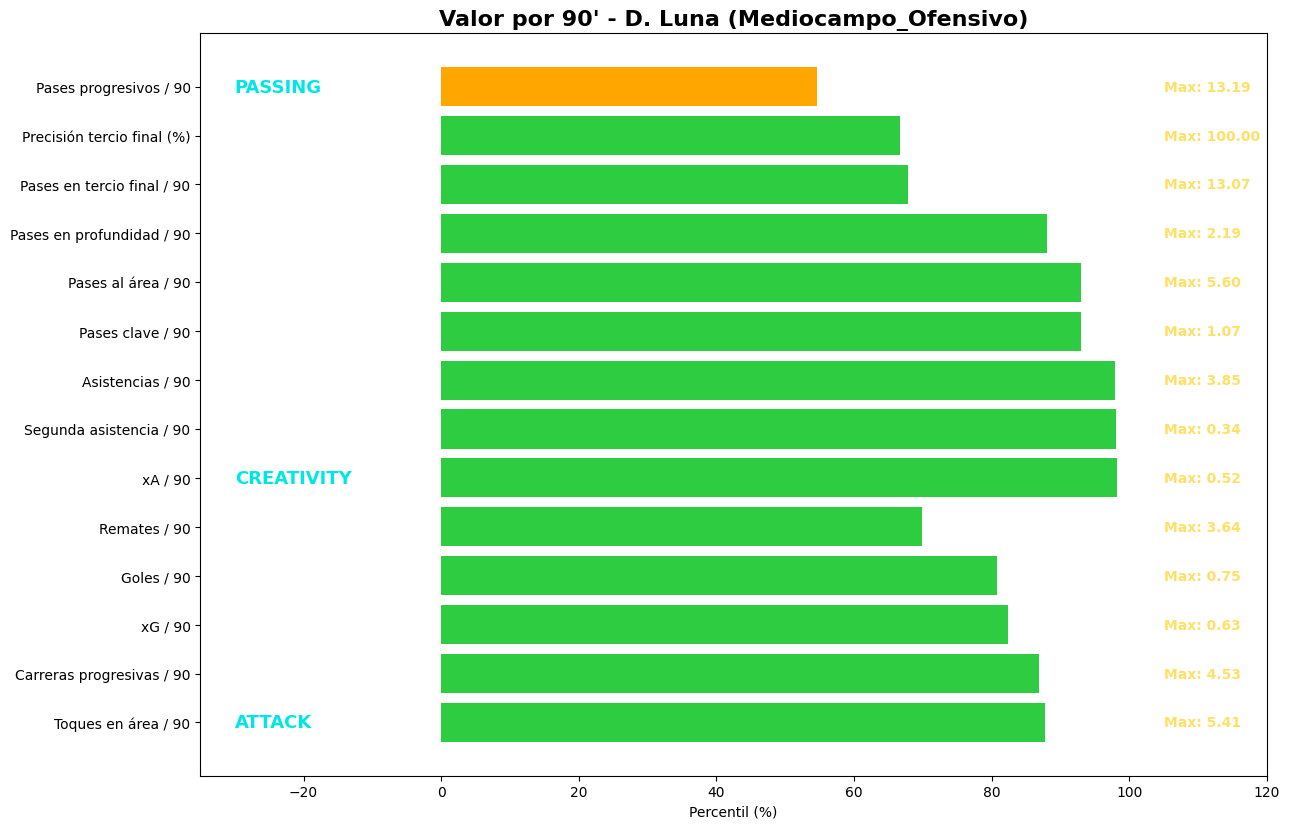

In [39]:
plot_player_percentiles_by_category(df, "D. Luna", "Mediocampo_Ofensivo", metricas_por_tipo, category_metrics_players)